In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
import sqlite3
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline
rubin_sim.__version__

'1.3.2'

In [6]:
from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
print(f"Using {run_name}, to be read from {opsim_fname}")
# TODO: update to v3.3
# opsim_fname is being pulled from a rubin_sim command - Heather is going to update this.

Using baseline_v2.1_10yrs, to be read from /global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db


Pulling time slices using the sql query

In [37]:
# Here we define a function for some of the metric plots we want to show.
# TODO: allow customization of metric resolution, results for intermediate years.
# Can use plot_funcs kwarg in metric_plots to change what is plotted.
# Check varying `nside` once we can load dust maps

# Modifying Rachel's version to change constraint externally

nside=64
surveyAreas = SkyAreaGenerator(nside=nside)
map_footprints, map_labels = surveyAreas.return_maps()

def metric_plots(use_run_name, use_opsim_fname, use_metric=maf.ExgalM5(), use_constraint='filter="i" and note not like "DD%" and note not like "twilight_neo"', use_color_min=None, use_color_max=None):
    # use_run_name says which OpSim DB we want to use, e.g. `baseline_v2.1_10yrs` - will also be used for labels
    # use_opsim_fname says where it lives, e.g. `/global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db`
    if use_color_min is not None and use_color_max is not None:
        plot_dict={"color_min": use_color_min, "color_max": use_color_max, "x_min": use_color_min, "x_max": use_color_max}
    else:
        plot_dict=None
    #print(use_constraint , 'inside metric plots')

    depth_map_bundle = maf.MetricBundle(
        metric=use_metric,
        # previous line was originally using maf.Coaddm5Metric()
        slicer=maf.HealpixSubsetSlicer(nside=nside, use_cache=False, hpid=np.where(map_labels == "lowdust")[0]),
        #slicer=maf.HealpixSlicer(nside=nside, use_cache=False),
        # Above has changed to avoid high dust regions
        constraint=use_constraint,
        # Reject certain types of observations
        run_name=use_run_name,
        summary_metrics=[maf.MedianMetric(), maf.MeanMetric(), maf.RmsMetric()],
        plot_dict=plot_dict
    )

    bd = maf.metricBundles.make_bundles_dict_from_list([depth_map_bundle])
    bgroup = maf.MetricBundleGroup(
        bd, use_opsim_fname
    )
    bgroup.run_all()
    
    return bgroup, bd

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


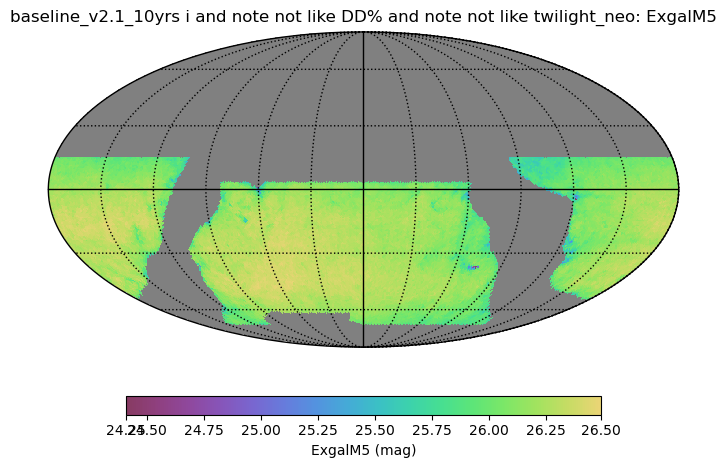

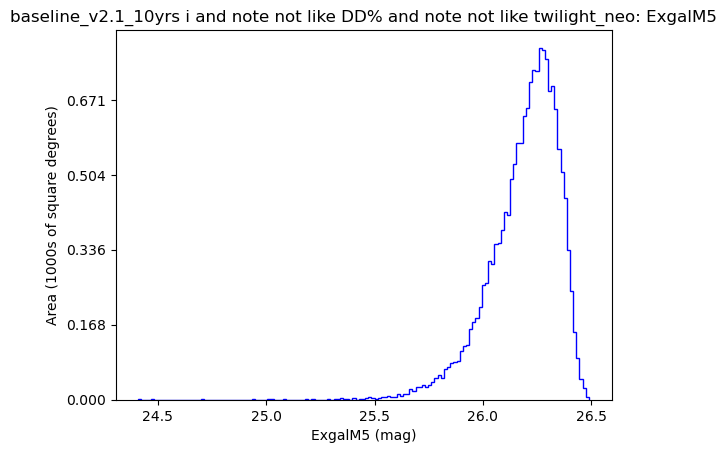

In [8]:
# Apply the above routine to our baseline sim, and show the plots
opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
bgroup, bd = metric_plots(run_name, opsim_fname)
bgroup.plot_all(closefigs=False)

Printing all years ['0', '365', '730', '1095', '1461', '1826', '2191', '2557', '2922', '3287', '3653']
0 365
filter="i" and note not like "DD%" and night >= 0 and night <= 365 and note not like "twilight_neo" 
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


1 730
filter="i" and note not like "DD%" and night >= 365 and night <= 730 and note not like "twilight_neo" 
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


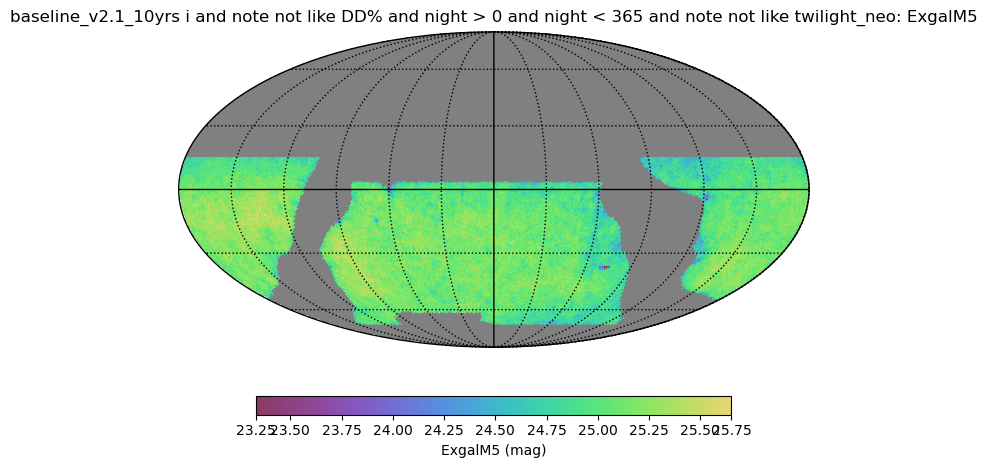

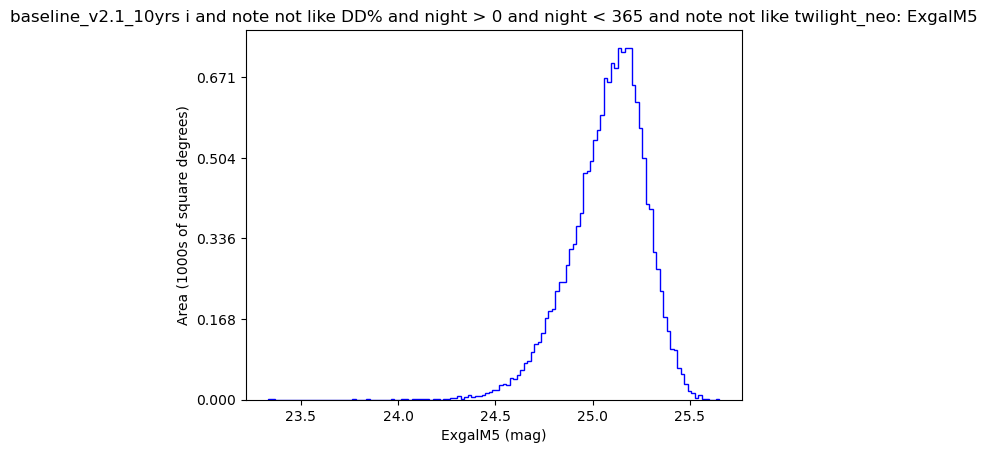

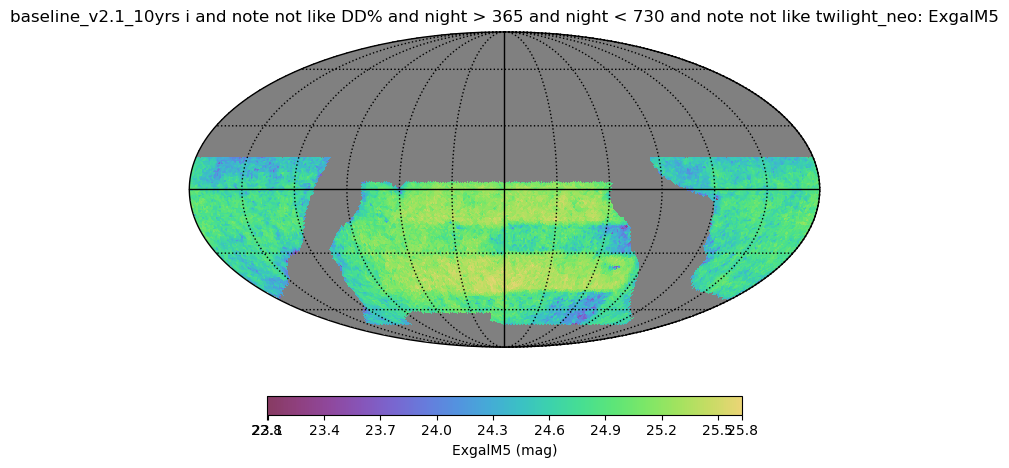

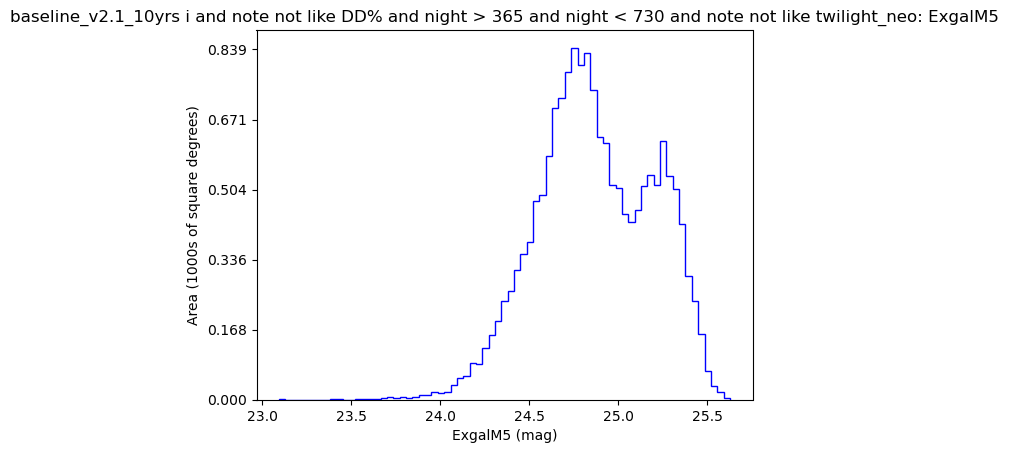

In [39]:
constraintt='filter="i" and note not like "DD%" and night >= YY and night <= XX and note not like "twilight_neo" '

years = [str(int(i)) for i in np.linspace(0,3653,11)]
print(f"Printing all years {years}")

for i,year in enumerate(years[1:3]):
    constraintval = constraintt
    constraintval=constraintval.replace('XX',year)
    constraintval=constraintval.replace('YY',years[i])
    print(constraintval)
    bgroup, bd = metric_plots(run_name, opsim_fname, use_constraint=constraintval)
    bgroup.plot_all(closefigs=False)    

